# Análise Exploratória Inicial - Fashion Product Images Dataset

Este notebook fornece uma visão geral do dataset e análises exploratórias iniciais.

## Objetivos
1. Carregar e explorar a estrutura dos dados
2. Analisar distribuições de categorias
3. Visualizar exemplos de produtos
4. Identificar padrões e insights iniciais
5. Preparar insights para planejamento de geração sintética

In [5]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 6)

%matplotlib inline

## 1. Configuração de Caminhos

In [6]:
# Caminhos do dataset
DATASET_BASE = Path("/Users/jwcunha/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset/versions/1/fashion-dataset/fashion-dataset")

STYLES_CSV = DATASET_BASE / "styles.csv"
IMAGES_CSV = DATASET_BASE / "images.csv"
IMAGES_DIR = DATASET_BASE / "images"
STYLES_JSON_DIR = DATASET_BASE / "styles"

print(f"Dataset base: {DATASET_BASE}")
print(f"Dataset exists: {DATASET_BASE.exists()}")

Dataset base: /Users/jwcunha/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset/versions/1/fashion-dataset/fashion-dataset
Dataset exists: True


## 2. Carregamento de Dados

In [7]:
# Carregar CSV principal com tratamento de erros
# Nota: Linha 6044 tem campo extra - usando on_bad_lines='skip' para ignorar linhas malformadas
print("Carregando dataset...")
try:
    df_styles = pd.read_csv(STYLES_CSV, encoding='utf-8', on_bad_lines='skip')
    print(f"✓ CSV carregado com sucesso!")
except Exception as e:
    print(f"⚠️  Erro com UTF-8, tentando encoding alternativo...")
    df_styles = pd.read_csv(STYLES_CSV, encoding='latin1', on_bad_lines='skip')
    print(f"✓ CSV carregado com encoding alternativo!")

print(f"\nTotal de produtos: {len(df_styles):,}")
print(f"Colunas disponíveis: {list(df_styles.columns)}")
print(f"\nPrimeiras linhas:")
df_styles.head()

Carregando dataset...
✓ CSV carregado com sucesso!

Total de produtos: 44,424
Colunas disponíveis: ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName']

Primeiras linhas:


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [8]:
# Informações do DataFrame
print("Informações do Dataset:")
print("="*60)
df_styles.info()

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [9]:
# Estatísticas descritivas
df_styles.describe(include='all')

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
count,44424.000000,44424,44424,44424,44424,44409,44403,44423.000000,44107,44417
unique,NaN,5,7,45,143,46,4,NaN,8,31121
top,NaN,Men,Apparel,Topwear,Tshirts,Black,Summer,NaN,Casual,Lucera Women Silver Earrings
freq,NaN,22147,21397,15402,7067,9728,21472,NaN,34406,82
mean,29696.334301,NaN,NaN,NaN,NaN,NaN,NaN,2012.806497,NaN,NaN
std,17049.490518,NaN,NaN,NaN,NaN,NaN,NaN,2.126480,NaN,NaN
min,1163.000000,NaN,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN
25%,14768.750000,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN
50%,28618.500000,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN
75%,44683.250000,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000,NaN,NaN


## 3. Análise de Valores Faltantes

In [10]:
# Valores faltantes
missing = df_styles.isnull().sum()
missing_pct = (missing / len(df_styles)) * 100

missing_df = pd.DataFrame({
    'Valores Faltantes': missing,
    'Percentual (%)': missing_pct
}).sort_values('Valores Faltantes', ascending=False)

print("Análise de Valores Faltantes:")
print("="*60)
missing_df[missing_df['Valores Faltantes'] > 0]

Análise de Valores Faltantes:


,Valores Faltantes,Percentual (%)
usage,317,0.713578
season,21,0.047272
baseColour,15,0.033766
productDisplayName,7,0.015757
year,1,0.002251


## 4. Distribuições de Categorias

In [11]:
# Função auxiliar para plotar distribuições
def plot_category_distribution(df, column, title, top_n=None, figsize=(12, 6)):
    """
    Plota a distribuição de uma coluna categórica.
    
    Args:
        df: DataFrame
        column: Nome da coluna
        title: Título do gráfico
        top_n: Número de categorias a mostrar (None = todas)
        figsize: Tamanho da figura
    """
    value_counts = df[column].value_counts()
    if top_n:
        value_counts = value_counts.head(top_n)
    
    fig, ax = plt.subplots(figsize=figsize)
    value_counts.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel(column)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', alpha=0.3)
    
    # Adicionar valores nas barras
    for i, v in enumerate(value_counts):
        ax.text(i, v + max(value_counts)*0.01, f'{v:,}', 
                ha='center', va='bottom', fontsize=9)
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Mostrar percentuais
    print(f"\nDistribuição de {column}:")
    print("="*60)
    for cat, count in value_counts.items():
        pct = (count / len(df)) * 100
        print(f"{cat:20s}: {count:6,} ({pct:5.2f}%)")

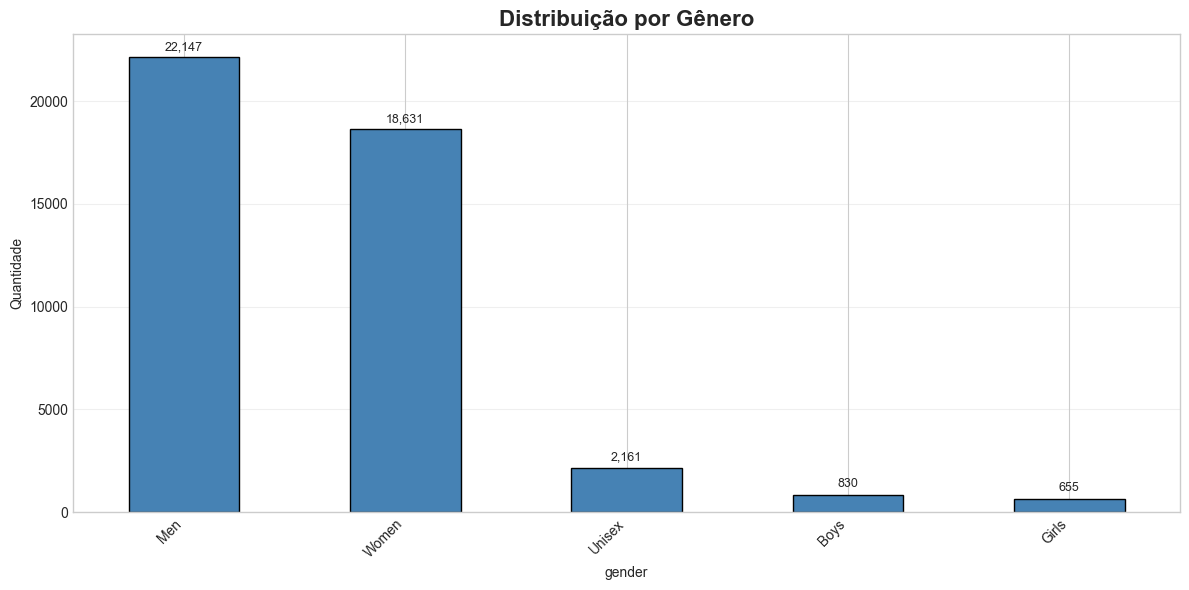


Distribuição de gender:
Men                 : 22,147 (49.85%)
Women               : 18,631 (41.94%)
Unisex              :  2,161 ( 4.86%)
Boys                :    830 ( 1.87%)
Girls               :    655 ( 1.47%)


In [12]:
# Distribuição por Gênero
plot_category_distribution(df_styles, 'gender', 'Distribuição por Gênero')

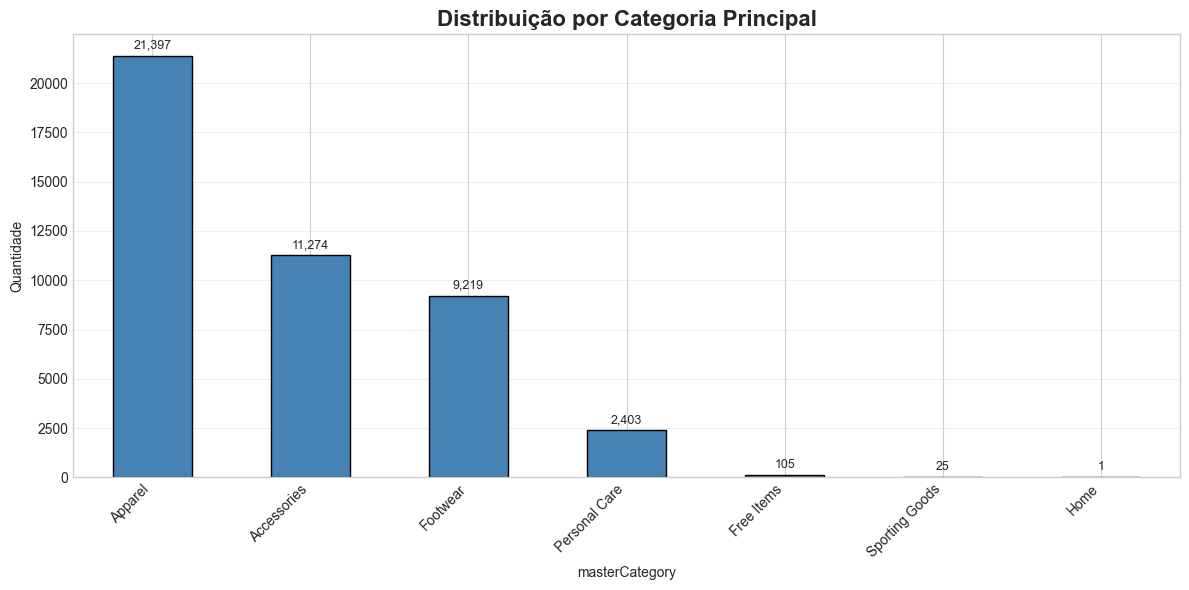


Distribuição de masterCategory:
Apparel             : 21,397 (48.17%)
Accessories         : 11,274 (25.38%)
Footwear            :  9,219 (20.75%)
Personal Care       :  2,403 ( 5.41%)
Free Items          :    105 ( 0.24%)
Sporting Goods      :     25 ( 0.06%)
Home                :      1 ( 0.00%)


In [13]:
# Distribuição por Categoria Principal
plot_category_distribution(df_styles, 'masterCategory', 'Distribuição por Categoria Principal')

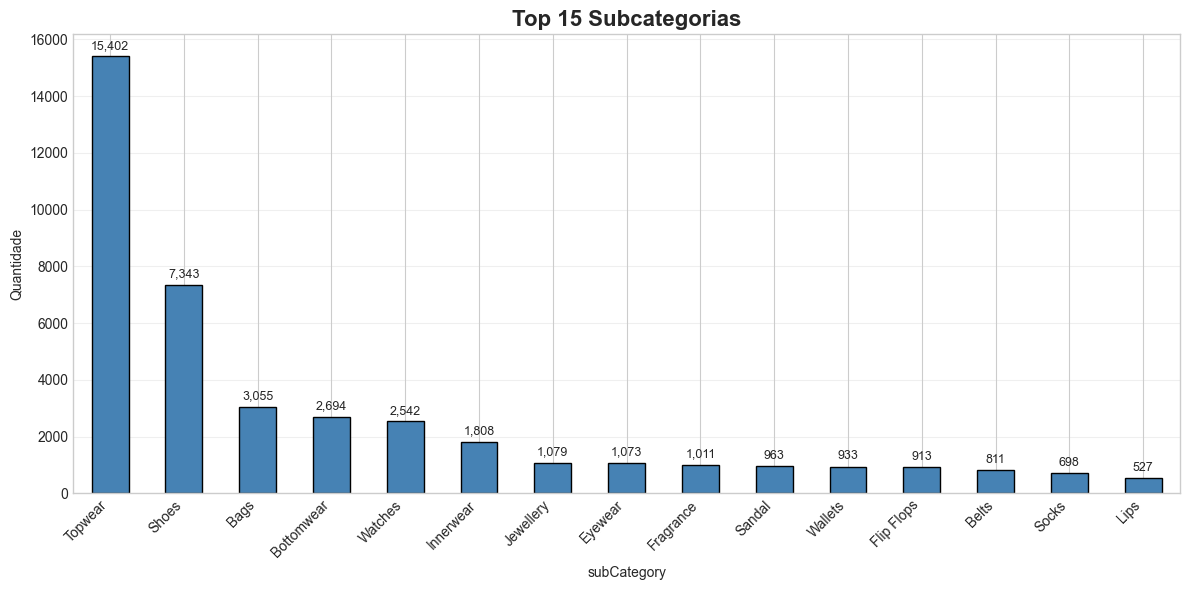


Distribuição de subCategory:
Topwear             : 15,402 (34.67%)
Shoes               :  7,343 (16.53%)
Bags                :  3,055 ( 6.88%)
Bottomwear          :  2,694 ( 6.06%)
Watches             :  2,542 ( 5.72%)
Innerwear           :  1,808 ( 4.07%)
Jewellery           :  1,079 ( 2.43%)
Eyewear             :  1,073 ( 2.42%)
Fragrance           :  1,011 ( 2.28%)
Sandal              :    963 ( 2.17%)
Wallets             :    933 ( 2.10%)
Flip Flops          :    913 ( 2.06%)
Belts               :    811 ( 1.83%)
Socks               :    698 ( 1.57%)
Lips                :    527 ( 1.19%)


In [14]:
# Distribuição por Subcategoria (Top 15)
plot_category_distribution(df_styles, 'subCategory', 'Top 15 Subcategorias', top_n=15)

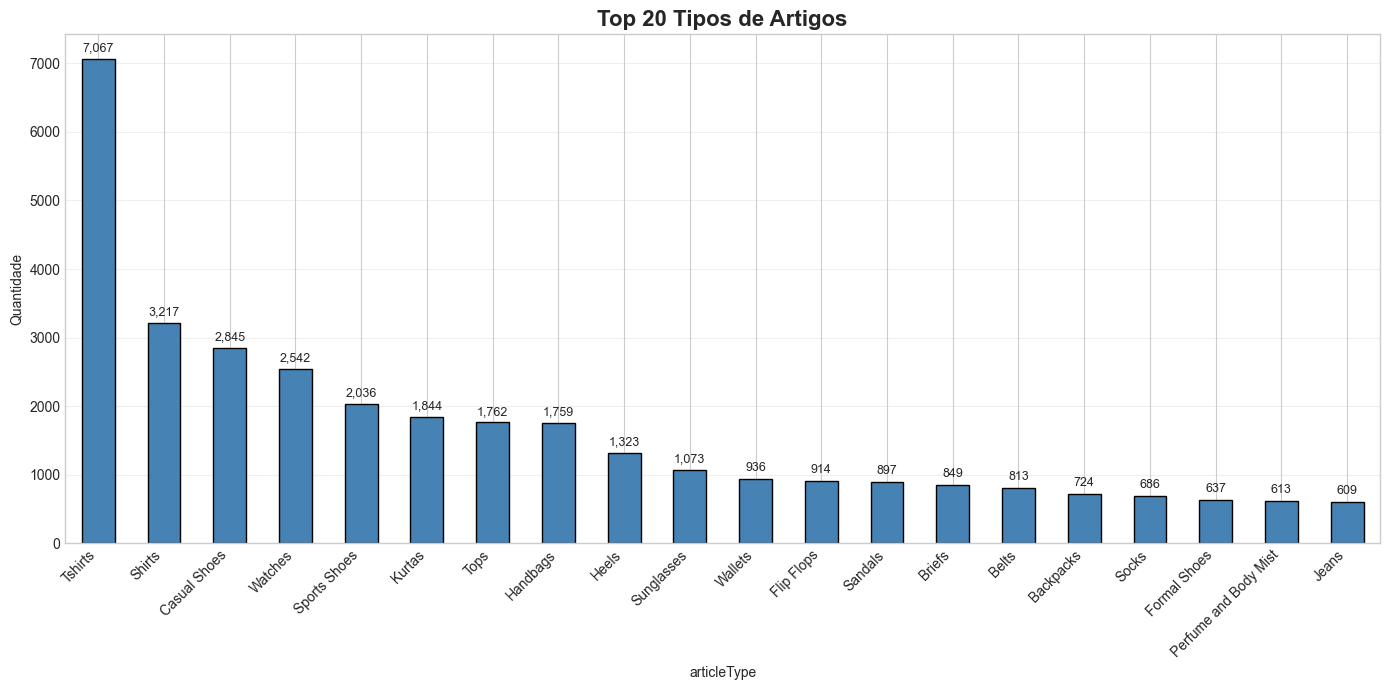


Distribuição de articleType:
Tshirts             :  7,067 (15.91%)
Shirts              :  3,217 ( 7.24%)
Casual Shoes        :  2,845 ( 6.40%)
Watches             :  2,542 ( 5.72%)
Sports Shoes        :  2,036 ( 4.58%)
Kurtas              :  1,844 ( 4.15%)
Tops                :  1,762 ( 3.97%)
Handbags            :  1,759 ( 3.96%)
Heels               :  1,323 ( 2.98%)
Sunglasses          :  1,073 ( 2.42%)
Wallets             :    936 ( 2.11%)
Flip Flops          :    914 ( 2.06%)
Sandals             :    897 ( 2.02%)
Briefs              :    849 ( 1.91%)
Belts               :    813 ( 1.83%)
Backpacks           :    724 ( 1.63%)
Socks               :    686 ( 1.54%)
Formal Shoes        :    637 ( 1.43%)
Perfume and Body Mist:    613 ( 1.38%)
Jeans               :    609 ( 1.37%)


In [15]:
# Distribuição por Tipo de Artigo (Top 20)
plot_category_distribution(df_styles, 'articleType', 'Top 20 Tipos de Artigos', top_n=20, figsize=(14, 7))

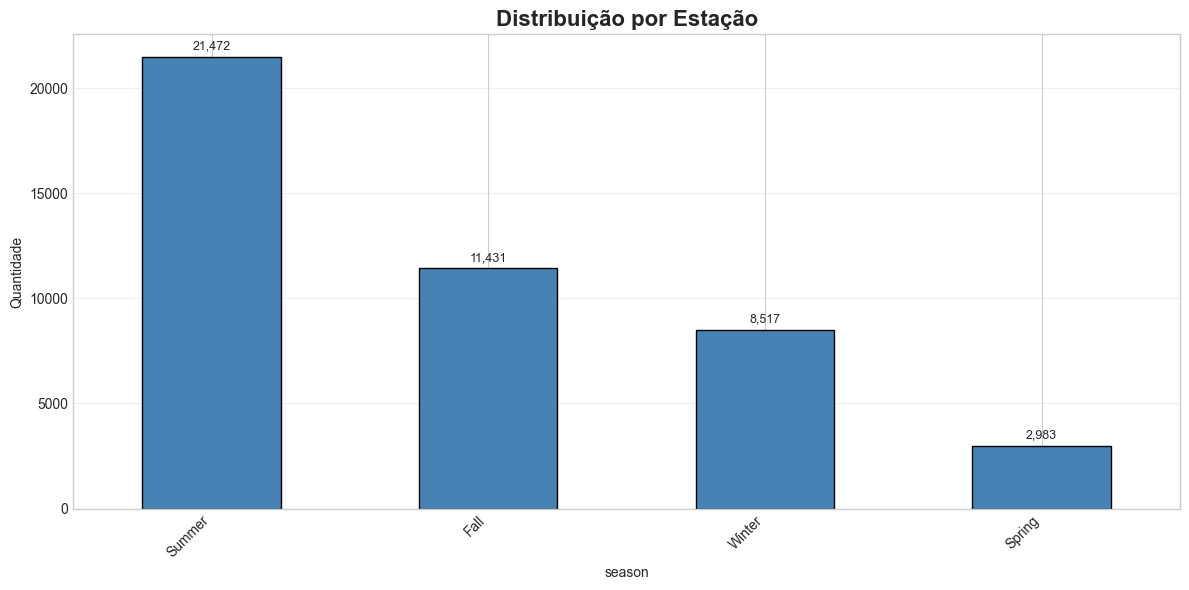


Distribuição de season:
Summer              : 21,472 (48.33%)
Fall                : 11,431 (25.73%)
Winter              :  8,517 (19.17%)
Spring              :  2,983 ( 6.71%)


In [16]:
# Distribuição por Estação
plot_category_distribution(df_styles, 'season', 'Distribuição por Estação')

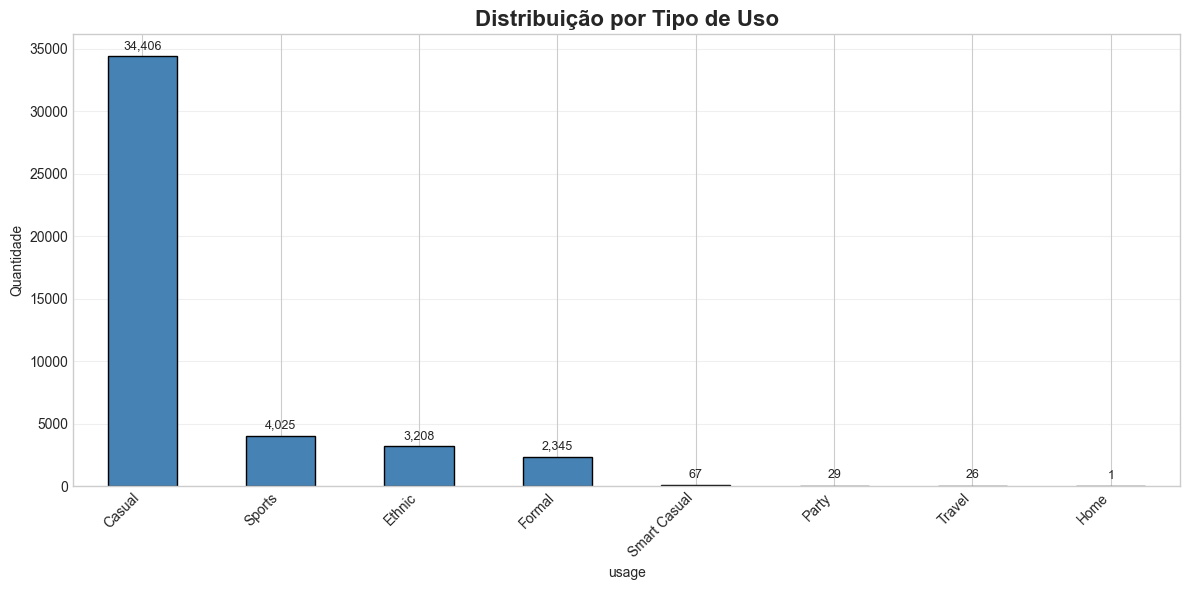


Distribuição de usage:
Casual              : 34,406 (77.45%)
Sports              :  4,025 ( 9.06%)
Ethnic              :  3,208 ( 7.22%)
Formal              :  2,345 ( 5.28%)
Smart Casual        :     67 ( 0.15%)
Party               :     29 ( 0.07%)
Travel              :     26 ( 0.06%)
Home                :      1 ( 0.00%)


In [17]:
# Distribuição por Uso
plot_category_distribution(df_styles, 'usage', 'Distribuição por Tipo de Uso')

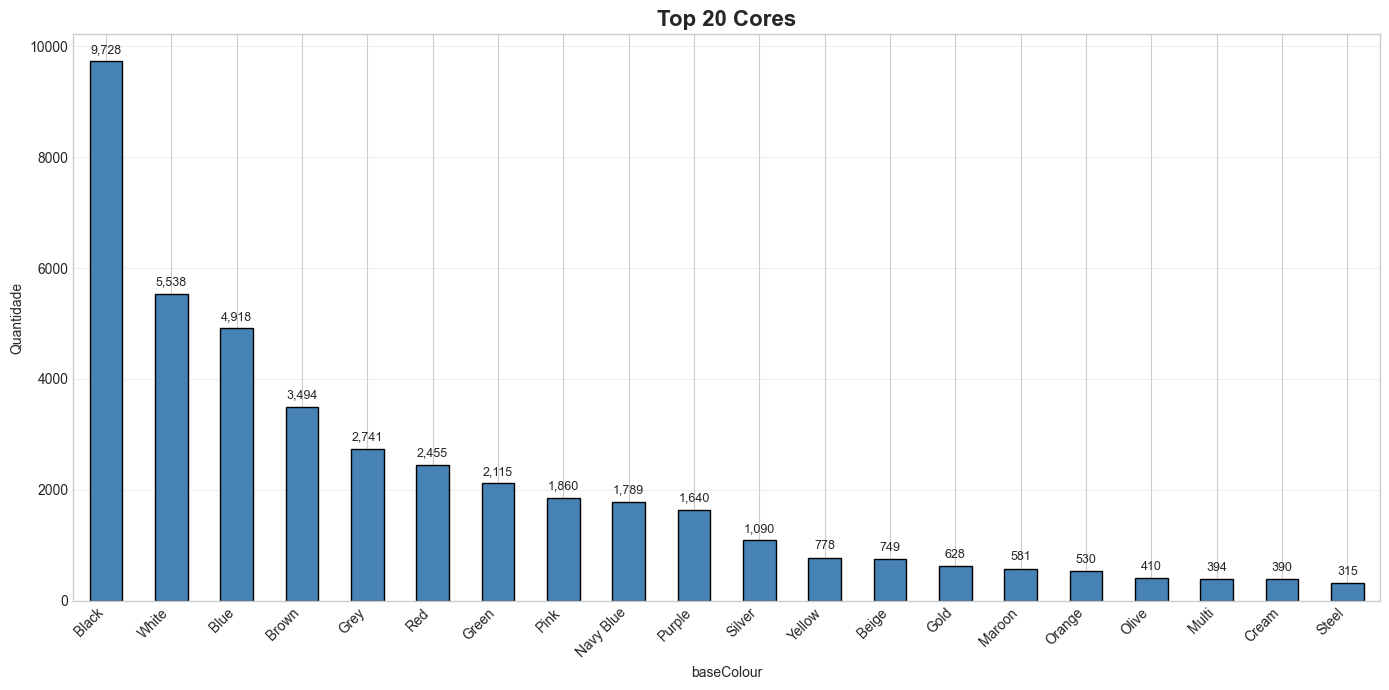


Distribuição de baseColour:
Black               :  9,728 (21.90%)
White               :  5,538 (12.47%)
Blue                :  4,918 (11.07%)
Brown               :  3,494 ( 7.87%)
Grey                :  2,741 ( 6.17%)
Red                 :  2,455 ( 5.53%)
Green               :  2,115 ( 4.76%)
Pink                :  1,860 ( 4.19%)
Navy Blue           :  1,789 ( 4.03%)
Purple              :  1,640 ( 3.69%)
Silver              :  1,090 ( 2.45%)
Yellow              :    778 ( 1.75%)
Beige               :    749 ( 1.69%)
Gold                :    628 ( 1.41%)
Maroon              :    581 ( 1.31%)
Orange              :    530 ( 1.19%)
Olive               :    410 ( 0.92%)
Multi               :    394 ( 0.89%)
Cream               :    390 ( 0.88%)
Steel               :    315 ( 0.71%)


In [18]:
# Distribuição por Cor (Top 20)
plot_category_distribution(df_styles, 'baseColour', 'Top 20 Cores', top_n=20, figsize=(14, 7))

## 5. Análise Temporal

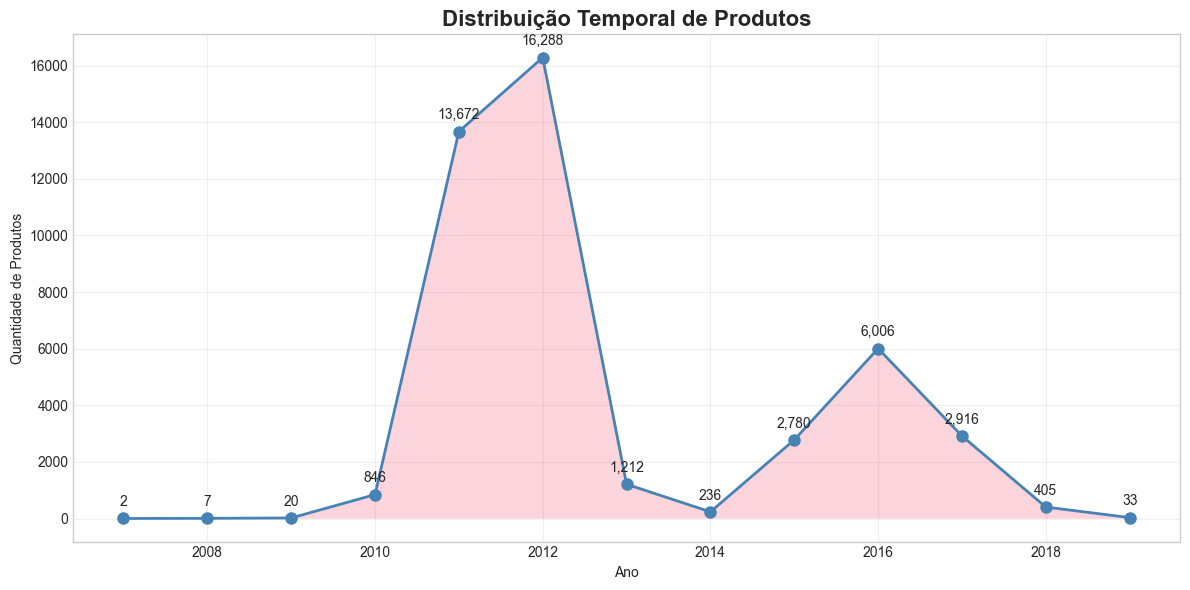


Distribuição por Ano:
2007.0:      2 ( 0.00%)
2008.0:      7 ( 0.02%)
2009.0:     20 ( 0.05%)
2010.0:    846 ( 1.90%)
2011.0: 13,672 (30.78%)
2012.0: 16,288 (36.66%)
2013.0:  1,212 ( 2.73%)
2014.0:    236 ( 0.53%)
2015.0:  2,780 ( 6.26%)
2016.0:  6,006 (13.52%)
2017.0:  2,916 ( 6.56%)
2018.0:    405 ( 0.91%)
2019.0:     33 ( 0.07%)


In [19]:
# Distribuição por Ano
year_dist = df_styles['year'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(year_dist.index, year_dist.values, marker='o', linewidth=2, markersize=8, color='steelblue')
ax.fill_between(year_dist.index, year_dist.values, alpha=0.3)
ax.set_title('Distribuição Temporal de Produtos', fontsize=16, fontweight='bold')
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade de Produtos')
ax.grid(True, alpha=0.3)

# Adicionar valores
for year, count in year_dist.items():
    ax.text(year, count + max(year_dist.values)*0.02, f'{count:,}', 
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("\nDistribuição por Ano:")
print("="*60)
for year, count in year_dist.items():
    pct = (count / len(df_styles)) * 100
    print(f"{year}: {count:6,} ({pct:5.2f}%)")

## 6. Análise Cruzada: Categoria vs Gênero

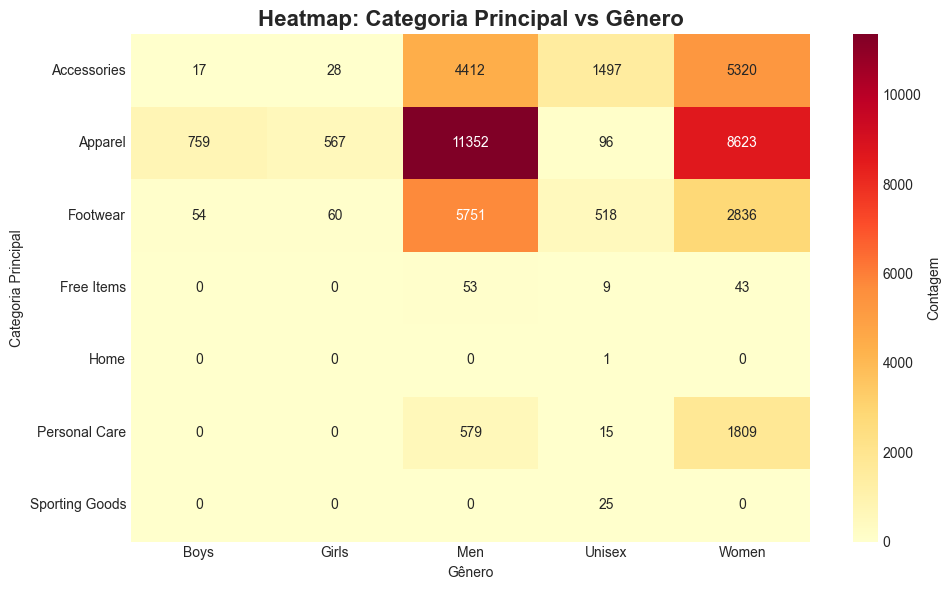


Tabela de Contingência:


gender,Boys,Girls,Men,Unisex,Women
masterCategory,,,,,
Accessories,17,28,4412,1497,5320
Apparel,759,567,11352,96,8623
Footwear,54,60,5751,518,2836
Free Items,0,0,53,9,43
Home,0,0,0,1,0
Personal Care,0,0,579,15,1809
Sporting Goods,0,0,0,25,0


In [20]:
# Crosstab: masterCategory vs gender
crosstab = pd.crosstab(df_styles['masterCategory'], df_styles['gender'])

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlOrRd', ax=ax, 
            cbar_kws={'label': 'Contagem'})
ax.set_title('Heatmap: Categoria Principal vs Gênero', fontsize=16, fontweight='bold')
ax.set_xlabel('Gênero')
ax.set_ylabel('Categoria Principal')
plt.tight_layout()
plt.show()

print("\nTabela de Contingência:")
crosstab

## 7. Análise de Metadados JSON (Amostra)

In [21]:
# Carregar um JSON de exemplo
sample_id = df_styles['id'].iloc[0]
json_path = STYLES_JSON_DIR / f"{sample_id}.json"

with open(json_path, 'r') as f:
    sample_json = json.load(f)

print(f"Exemplo de metadados JSON (ID: {sample_id})")
print("="*60)
print(json.dumps(sample_json, indent=2)[:2000])  # Primeiros 2000 caracteres
print("\n... (truncado)")

Exemplo de metadados JSON (ID: 15970)
{
  "notification": {},
  "meta": {
    "code": 200,
    "requestId": "246fba09-2d88-487c-9cba-9288acc9e121"
  },
  "data": {
    "id": 15970,
    "price": 1195,
    "discountedPrice": 1195,
    "styleType": "P",
    "productTypeId": 320,
    "articleNumber": "73223-00",
    "visualTag": "",
    "productDisplayName": "Turtle Check Men Navy Blue Shirt",
    "variantName": "Check",
    "myntraRating": 1,
    "catalogAddDate": 1434434991,
    "brandName": "Turtle",
    "ageGroup": "Adults-Men",
    "gender": "Men",
    "baseColour": "Navy Blue",
    "colour1": "White",
    "colour2": "NA",
    "fashionType": "Fashion",
    "season": "Fall",
    "year": "2011",
    "usage": "Casual",
    "vat": 5.5,
    "displayCategories": "Casual Wear",
    "weight": "0",
    "navigationId": 6,
    "landingPageUrl": "Shirts/Turtle/Turtle-Check-Men-Navy-Blue-Shirt/15970/buy",
    "articleAttributes": {
      "Fit": "Slim Fit",
      "Pattern": "Checked",
      "Body o

In [22]:
# Analisar campos disponíveis no JSON
if 'data' in sample_json:
    data = sample_json['data']
    print("\nCampos disponíveis no JSON:")
    print("="*60)
    for key in sorted(data.keys()):
        print(f"  - {key}")


Campos disponíveis no JSON:
  - ageGroup
  - articleAttributes
  - articleDisplayAttr
  - articleNumber
  - articleType
  - baseColour
  - brandName
  - brandUserProfile
  - catalogAddDate
  - codEnabled
  - colour1
  - colour2
  - crossLinks
  - discountedPrice
  - displayCategories
  - fashionType
  - gender
  - id
  - isEMIEnabled
  - landingPageUrl
  - lookGoodAlbum
  - masterCategory
  - myntraRating
  - navigationId
  - otherFlags
  - price
  - productDescriptors
  - productDisplayName
  - productTypeId
  - season
  - style360Images
  - styleImages
  - styleOptions
  - styleType
  - subCategory
  - usage
  - variantName
  - vat
  - visualTag
  - weight
  - year


## 8. Visualização de Produtos de Exemplo

Amostra aleatória de produtos:


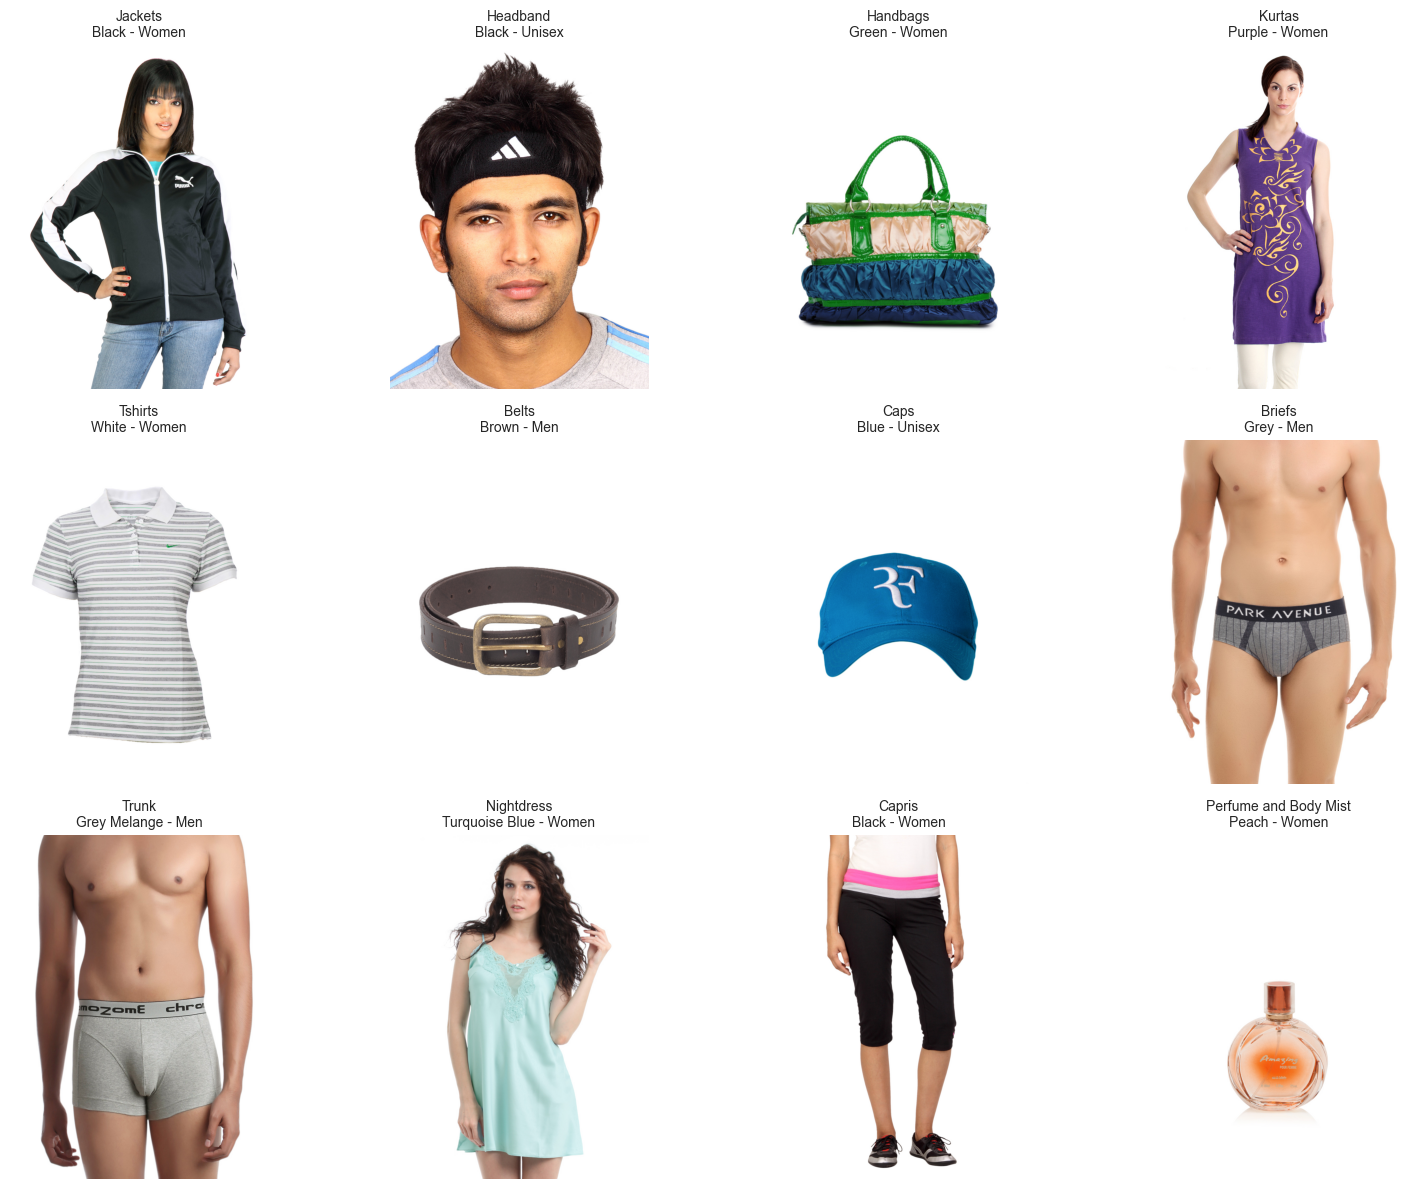

In [23]:
# Função para exibir grid de imagens
def display_product_grid(df, n_samples=12, figsize=(16, 12)):
    """
    Exibe um grid de imagens de produtos.
    
    Args:
        df: DataFrame com produtos
        n_samples: Número de produtos a exibir
        figsize: Tamanho da figura
    """
    samples = df.sample(n=n_samples, random_state=42)
    
    rows = 3
    cols = 4
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()
    
    for idx, (_, row) in enumerate(samples.iterrows()):
        if idx >= n_samples:
            break
            
        img_path = IMAGES_DIR / f"{row['id']}.jpg"
        
        if img_path.exists():
            img = Image.open(img_path)
            axes[idx].imshow(img)
            axes[idx].axis('off')
            
            # Título com informações do produto
            title = f"{row['articleType']}\n{row['baseColour']} - {row['gender']}"
            axes[idx].set_title(title, fontsize=10)
        else:
            axes[idx].text(0.5, 0.5, 'Imagem\nnão encontrada', 
                          ha='center', va='center', fontsize=12)
            axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# Exibir produtos aleatórios
print("Amostra aleatória de produtos:")
display_product_grid(df_styles)


Exemplos de produtos: Tshirts


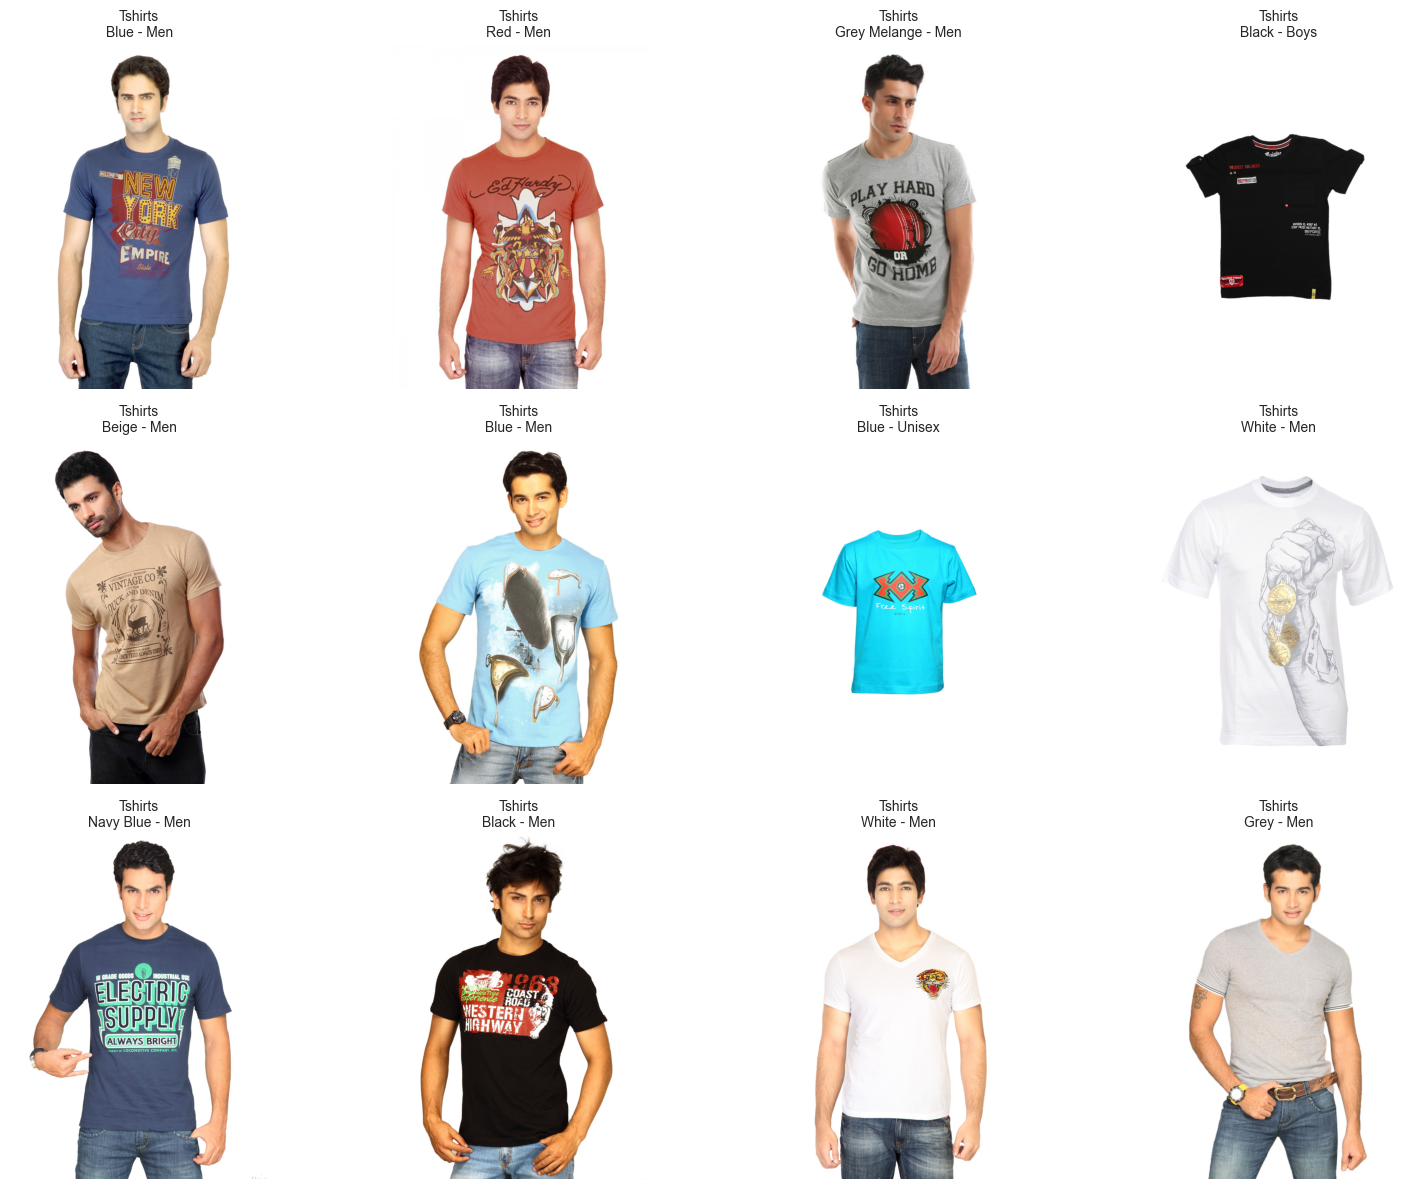

In [24]:
# Exibir produtos de uma categoria específica
category = 'Tshirts'
print(f"\nExemplos de produtos: {category}")
df_category = df_styles[df_styles['articleType'] == category]
display_product_grid(df_category)


Exemplos de produtos: Formal Shoes


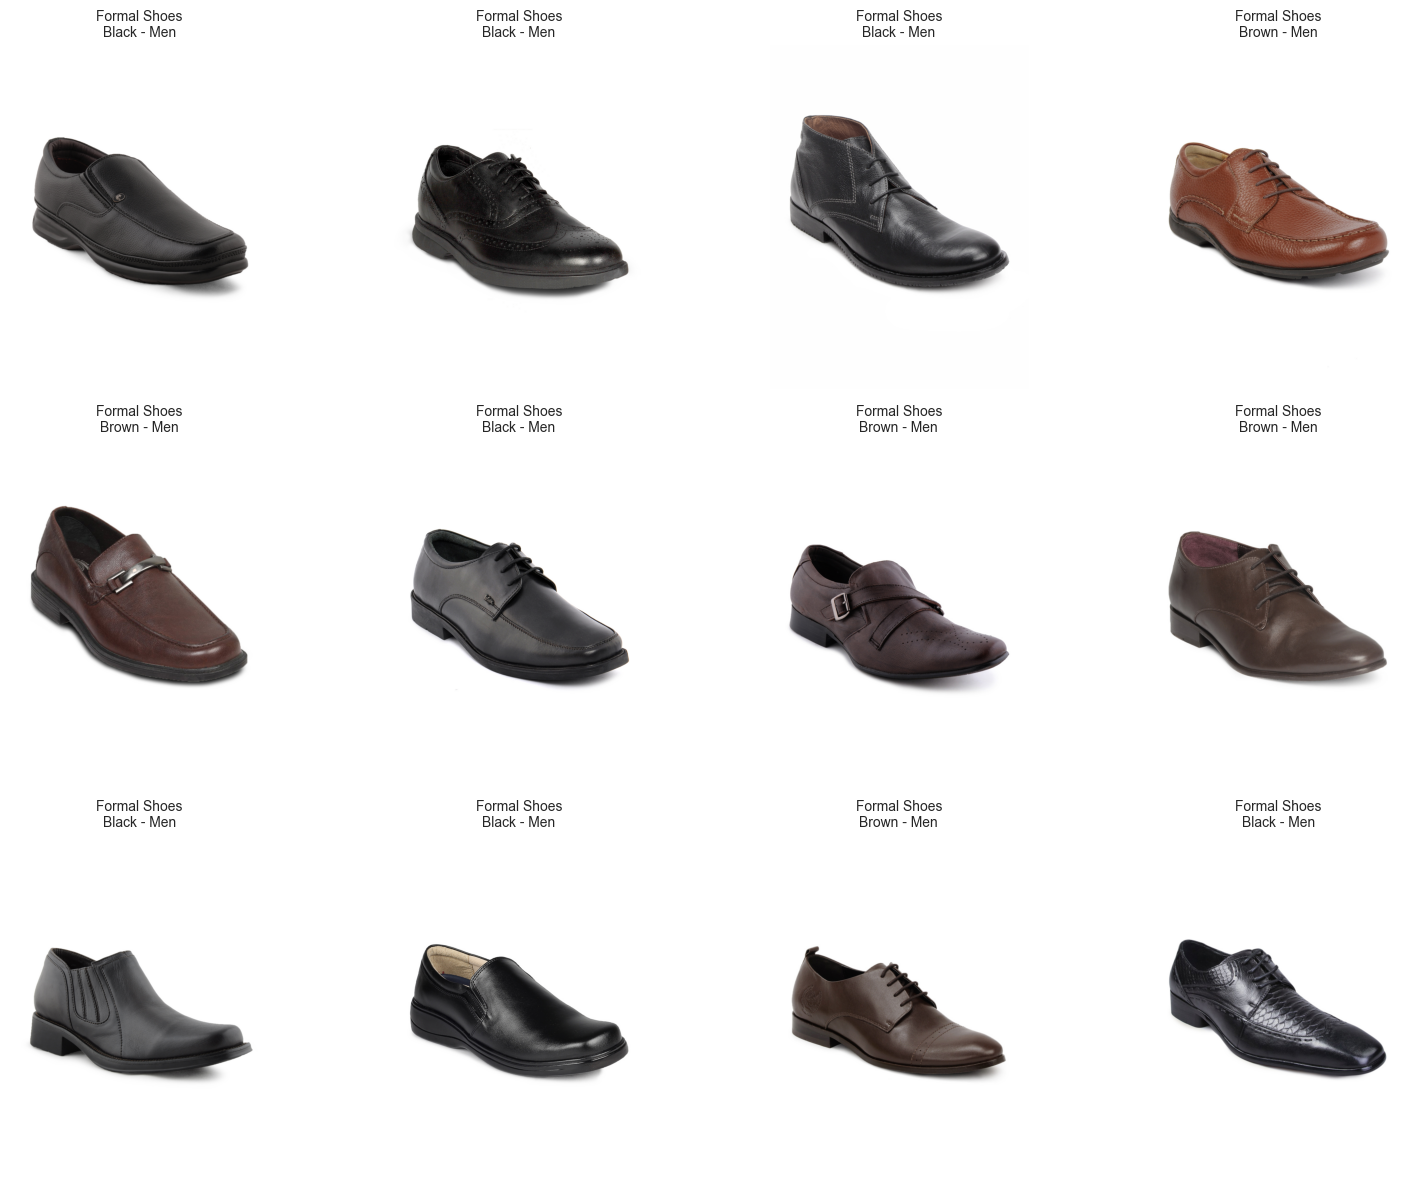

In [26]:
# Exibir produtos de uma categoria específica
category = 'Formal Shoes'
print(f"\nExemplos de produtos: {category}")
df_category = df_styles[df_styles['articleType'] == category]
display_product_grid(df_category)

## 9. Insights para Geração Sintética

### 9.1 Categorias Prioritárias para Modelagem

Baseado na análise, as seguintes categorias são as mais relevantes:

In [27]:
# Top 10 articleTypes para focar
top_articles = df_styles['articleType'].value_counts().head(10)

print("Top 10 Categorias para Modelagem de Geração Sintética:")
print("="*70)
for idx, (article, count) in enumerate(top_articles.items(), 1):
    pct = (count / len(df_styles)) * 100
    print(f"{idx:2d}. {article:25s}: {count:6,} produtos ({pct:5.2f}%)")

print(f"\n📊 Estes {len(top_articles)} tipos cobrem {top_articles.sum():,} produtos ({(top_articles.sum()/len(df_styles)*100):.1f}% do dataset)")

Top 10 Categorias para Modelagem de Geração Sintética:
 1. Tshirts                  :  7,067 produtos (15.91%)
 2. Shirts                   :  3,217 produtos ( 7.24%)
 3. Casual Shoes             :  2,845 produtos ( 6.40%)
 4. Watches                  :  2,542 produtos ( 5.72%)
 5. Sports Shoes             :  2,036 produtos ( 4.58%)
 6. Kurtas                   :  1,844 produtos ( 4.15%)
 7. Tops                     :  1,762 produtos ( 3.97%)
 8. Handbags                 :  1,759 produtos ( 3.96%)
 9. Heels                    :  1,323 produtos ( 2.98%)
10. Sunglasses               :  1,073 produtos ( 2.42%)

📊 Estes 10 tipos cobrem 25,468 produtos (57.3% do dataset)


### 9.2 Estatísticas de Balanceamento

In [28]:
# Análise de balanceamento por categoria principal
print("Balanceamento por Categoria Principal:")
print("="*70)

for master_cat in df_styles['masterCategory'].unique():
    df_cat = df_styles[df_styles['masterCategory'] == master_cat]
    n_products = len(df_cat)
    n_article_types = df_cat['articleType'].nunique()
    pct = (n_products / len(df_styles)) * 100
    
    print(f"\n{master_cat}:")
    print(f"  Total de produtos: {n_products:,} ({pct:.2f}%)")
    print(f"  Tipos de artigos: {n_article_types}")
    print(f"  Média por tipo: {n_products/n_article_types:.1f}")

Balanceamento por Categoria Principal:

Apparel:
  Total de produtos: 21,397 (48.17%)
  Tipos de artigos: 58
  Média por tipo: 368.9

Accessories:
  Total de produtos: 11,274 (25.38%)
  Tipos de artigos: 44
  Média por tipo: 256.2

Footwear:
  Total de produtos: 9,219 (20.75%)
  Tipos de artigos: 8
  Média por tipo: 1152.4

Personal Care:
  Total de produtos: 2,403 (5.41%)
  Tipos de artigos: 31
  Média por tipo: 77.5

Free Items:
  Total de produtos: 105 (0.24%)
  Tipos de artigos: 9
  Média por tipo: 11.7

Sporting Goods:
  Total de produtos: 25 (0.06%)
  Tipos de artigos: 3
  Média por tipo: 8.3

Home:
  Total de produtos: 1 (0.00%)
  Tipos de artigos: 1
  Média por tipo: 1.0


### 9.3 Recomendações para MVP

In [29]:
print("""\n🎯 RECOMENDAÇÕES PARA MVP DE GERAÇÃO SINTÉTICA:\n
=""" + "="*70 + """

1. CATEGORIAS INICIAIS (Top 3):
   - Tshirts (>6,000 exemplos)
   - Shirts (>5,000 exemplos)
   - Casual Shoes (>2,000 exemplos)
   
   Razão: Alta quantidade de exemplos para treinamento robusto

2. GÊNEROS PRIORITÁRIOS:
   - Men e Women (maior volume de dados)
   - Considerar Unisex para diversidade

3. CORES FREQUENTES:
   - Focar em cores com >1000 exemplos
   - Permite melhor qualidade de geração

4. ESTAÇÕES:
   - Equilibradas: todas as estações bem representadas
   - Possível gerar para todas as estações

5. ABORDAGEM INCREMENTAL:
   Fase 1: 1-2 categorias (Tshirts)
   Fase 2: Expandir para 5-10 categorias
   Fase 3: Full dataset

6. QUALIDADE DOS DADOS:
   - Imagens profissionais com fundo limpo ✓
   - Metadados ricos disponíveis ✓
   - Descrições textuais detalhadas ✓
   - Baixa taxa de valores faltantes ✓
""")


🎯 RECOMENDAÇÕES PARA MVP DE GERAÇÃO SINTÉTICA:


1. CATEGORIAS INICIAIS (Top 3):
   - Tshirts (>6,000 exemplos)
   - Shirts (>5,000 exemplos)
   - Casual Shoes (>2,000 exemplos)

   Razão: Alta quantidade de exemplos para treinamento robusto

2. GÊNEROS PRIORITÁRIOS:
   - Men e Women (maior volume de dados)
   - Considerar Unisex para diversidade

3. CORES FREQUENTES:
   - Focar em cores com >1000 exemplos
   - Permite melhor qualidade de geração

4. ESTAÇÕES:
   - Equilibradas: todas as estações bem representadas
   - Possível gerar para todas as estações

5. ABORDAGEM INCREMENTAL:
   Fase 1: 1-2 categorias (Tshirts)
   Fase 2: Expandir para 5-10 categorias
   Fase 3: Full dataset

6. QUALIDADE DOS DADOS:
   - Imagens profissionais com fundo limpo ✓
   - Metadados ricos disponíveis ✓
   - Descrições textuais detalhadas ✓
   - Baixa taxa de valores faltantes ✓



## 10. Próximos Passos

1. **Análise Detalhada de Imagens**: Executar `image_analysis.py`
2. **Análise de Metadados JSON**: Executar `json_metadata_analysis.py`
3. **Preparação de Dataset de Treino**: Criar splits treino/val/teste
4. **Baseline Models**: Implementar classificadores baseline
5. **Experimentação com Modelos Generativos**: Começar com categorias prioritárias

In [30]:
# Salvar dataset filtrado para categorias prioritárias
priority_categories = ['Tshirts', 'Shirts', 'Casual Shoes', 'Watches', 'Jeans']
df_priority = df_styles[df_styles['articleType'].isin(priority_categories)]

output_path = Path("../outputs/priority_products.csv")
df_priority.to_csv(output_path, index=False)

print(f"\n✅ Dataset de categorias prioritárias salvo: {output_path}")
print(f"   Total de produtos: {len(df_priority):,}")
print(f"   Percentual do dataset original: {(len(df_priority)/len(df_styles)*100):.1f}%")


✅ Dataset de categorias prioritárias salvo: ../outputs/priority_products.csv
   Total de produtos: 16,280
   Percentual do dataset original: 36.6%
